In [88]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
df = quandl.get("GDAX/USD", authtoken="qdT3g8Du2XKrNBSDnKCo")
days = [i for i in range(len(df))]

Let's get the average price per day:

In [90]:
zipped = zip(df.High, df.Low)
w = 0
df['AverageDay'] = np.nan
for i in zipped:
    df['AverageDay'][w] = np.average(i)
    w += 1

In [91]:
df = df[['Open','High','Low','AverageDay']]
df.tail()

,Open,High,Low,AverageDay
Date,,,,
2018-02-11,8560.00,8595.00,7851.00,8223.000
2018-02-12,8298.24,8883.00,8032.65,8457.825
2018-02-13,8867.49,8950.00,8393.10,8671.550
2018-02-14,8535.00,9436.00,8490.00,8963.000
2018-02-15,9430.00,10249.81,9342.46,9796.135


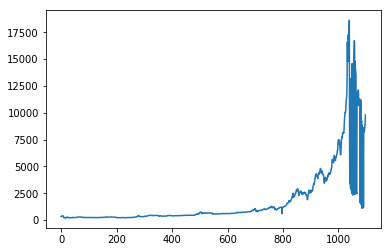

In [92]:
plt.plot(days, df.AverageDay)

We want to predict the High for the day using that day's opening price:

In [93]:
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [94]:
X_high = np.array(df.drop(['AverageDay','Low','High'], 1))
y_high = np.array(df['High'])

In [95]:
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high,test_size=0.25)

In [96]:
clf = LinearRegression()
clf.fit(X_train_high, y_train_high)
accuracy = clf.score(X_test_high, y_test_high)
accuracy

0.99802771081927655

We seem to get a very accurate model. With more time, it would behoove us to look into these later:

In [97]:
def predictHigh(openingPrice):
    return int(clf.predict([openingPrice][0]))

Now let's predict a day's lowest price using it's opening price:

In [98]:
X_low = np.array(df.drop(['Low','High','AverageDay'], 1))
y_low = np.array(df['Low'])

In [99]:
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low,test_size=0.25)

In [100]:
clfLow = LinearRegression()
clfLow.fit(X_train_low, y_train_low)
accuracy = clfLow.score(X_test_low, y_test_low)
accuracy

0.99506473557445096

Again, a very high accuracy rating, perhaps it has to do with the low number of features:

In [101]:
def predictLow(openingPrice):
    return int(clfLow.predict([openingPrice][0]))

In [102]:
def PredictLowHigh(openingPrice):
    print("Today's Highest Price Should Be:", predictHigh(openingPrice))
    print("Today's Lowest Price Should Be:", predictLow(openingPrice))
    print("With an average of:", (predictHigh(openingPrice)+predictLow(openingPrice))/2)

In [103]:
PredictLowHigh(9430)

Today's Highest Price Should Be: 9988
Today's Lowest Price Should Be: 8887
With an average of: 9437.5


In [104]:
lowfunc = np.vectorize(predictLow)
low = [number for number in df['Open']]
lowfunc(low)
highfunc = np.vectorize(predictHigh)

In [105]:
df['Predicted Low'] = lowfunc(low)
df['Predicted High'] = highfunc(low)
df = df[['Open','High','Predicted High','Low','Predicted Low']]
df.tail()

,Open,High,Predicted High,Low,Predicted Low
Date,,,,,
2018-02-11,8560.00,8595.00,9065,7851.00,8070
2018-02-12,8298.24,8883.00,8787,8032.65,7824
2018-02-13,8867.49,8950.00,9391,8393.10,8359
2018-02-14,8535.00,9436.00,9038,8490.00,8047
2018-02-15,9430.00,10249.81,9988,9342.46,8887


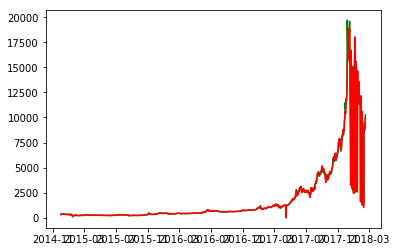

In [110]:
plt.plot(df['High'],'g',df['Predicted High'], 'r')

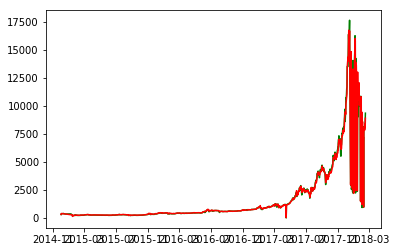

In [111]:
plt.plot(df['Low'], 'g', df['Predicted Low'], 'r')